## Part 1

1. Import the necessary libraries.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [99]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [4]:
print(customer_df.shape)
customer_df.head()

(9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case). (lowercase with _ for spaces)

In [100]:
new_names =[]
for col in list(customer_df.columns):
    col = re.sub(' ', '_', col.lower())
    new_names.append(col)
    
customer_df.columns = new_names

In [101]:
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. Change effective to date column to datetime format.

In [47]:
customer_df.effective_to_date

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

In [102]:
customer_df.effective_to_date  = pd.to_datetime(customer_df.effective_to_date)
customer_df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

6. Check NaN values per column.

In [103]:
customer_df.isnull().sum()  #no NaN values

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [108]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [139]:
def differentiate(c):
    if c.dtype == 'O':
        return 'categorical'
    if c.dtype == 'int64' or c.dtype == 'datetime64[ns]':
        return 'discrete'
    if c.dtype == 'float64':
        return 'continous'

In [140]:
differentiate(customer_df['effective_to_date'])

'discrete'

In [133]:
len(customer_df.effective_to_date.unique())

59

In [146]:
continuous = customer_df.select_dtypes('float64')
discrete = pd.concat([customer_df.select_dtypes('int64'), customer_df.select_dtypes('datetime64[ns]')], axis=1)
categorical = customer_df.select_dtypes('object')


In [142]:
continuous

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


In [147]:
discrete

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_to_date
0,56274,69,32,5,0,1,2011-02-24
1,0,94,13,42,0,8,2011-01-31
2,48767,108,18,38,0,2,2011-02-19
3,0,106,18,65,0,7,2011-01-20
4,43836,73,12,44,0,1,2011-02-03
...,...,...,...,...,...,...,...
9129,71941,73,18,89,0,2,2011-02-10
9130,21604,79,14,28,0,1,2011-02-12
9131,0,85,9,37,3,2,2011-02-06
9132,21941,96,34,3,0,3,2011-02-03


In [148]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


8 For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [80]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [163]:
customer_df.state.value_counts()
customer_df.response.value_counts()
customer_df.employmentstatus.value_counts()
customer_df.gender.value_counts()
customer_df.location_code.value_counts()
customer_df.marital_status.value_counts()
customer_df.policy_type.value_counts()
customer_df.policy.value_counts()
customer_df.renew_offer_type.value_counts()
customer_df.sales_channel.value_counts()
customer_df.vehicle_class.value_counts()
customer_df.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

No unusual values in the categorical fields.

9. Get categorical features.

In [164]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


10. What should we do with the customer_id column?

In [167]:
customer_df['customer_alpha'] = customer_df['customer'].apply(lambda re.findall('[\D*]', x) for x)

SyntaxError: invalid syntax (1989020797.py, line 1)

The customer column should be dropped as it contains all unique values and there is no documentaion about any info it might hold. 

In [169]:
categorical.drop(['customer'], axis=1, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## PART 2 OF LAB: Cleaning categorical data

1. Import the necessary libraries if you are starting a new notebook

Already done, see beginning of first part of lab.

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [170]:
continuous_df = continuous.copy()
discrete_df = discrete.copy()

3. Plot a correlation matrix, what can you see?

In [174]:
cm_discrete = discrete_df.corr()
cm_discrete

,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
income,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [175]:
cm_continuous = continuous_df.corr()
cm_continuous

,customer_lifetime_value,total_claim_amount
customer_lifetime_value,1.000000,0.226451
total_claim_amount,0.226451,1.000000


I am not seeing any multicolinearity between features.

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

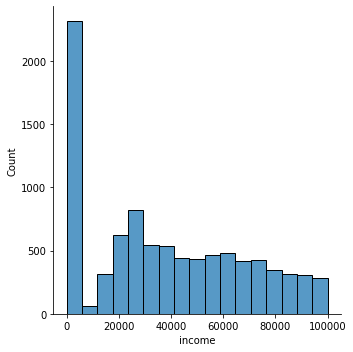

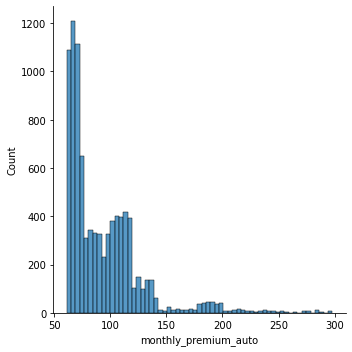

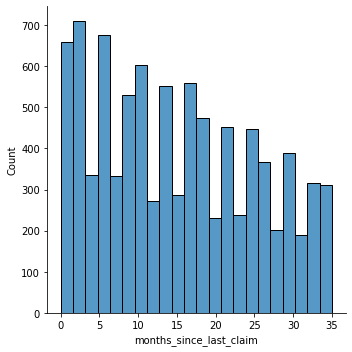

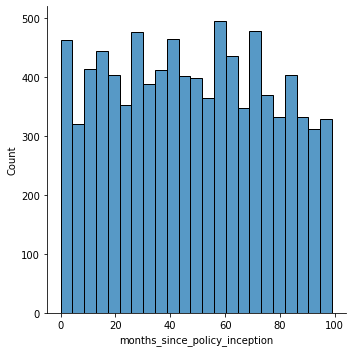

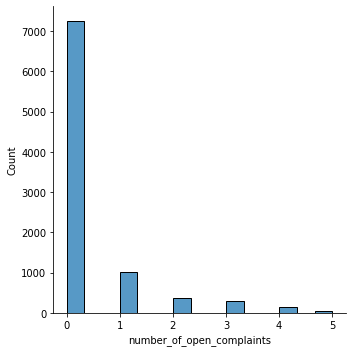

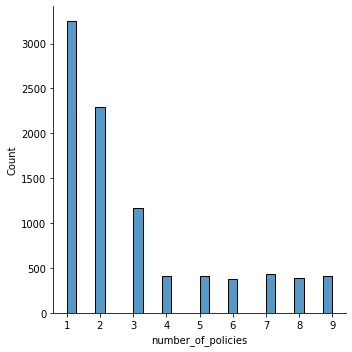

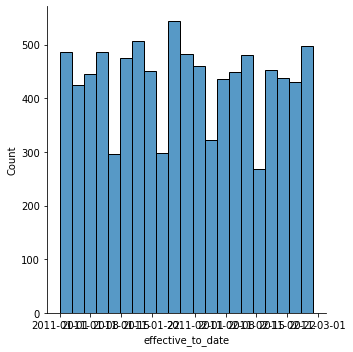

In [182]:
def discrete_plots(df):
    for c in list(df.columns):
        sns.displot(df[c])
    plt.show()
    return 
    
discrete_plots(discrete_df)    
    

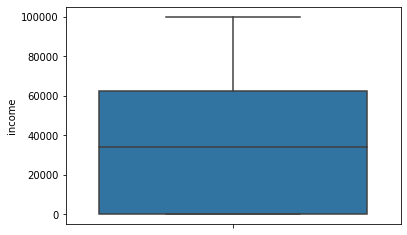

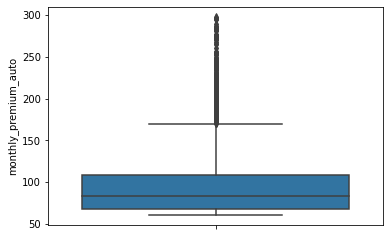

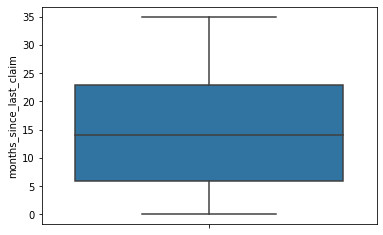

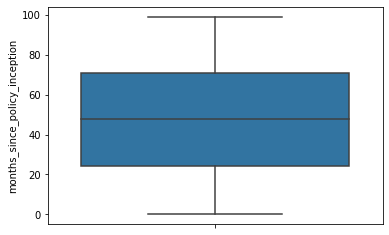

In [211]:
sns.boxplot(y=discrete_df['income'])
plt.show()
sns.boxplot(y=discrete_df['monthly_premium_auto'])
plt.show()
sns.boxplot(y=discrete_df['months_since_last_claim'])
plt.show()
sns.boxplot(y=discrete_df['months_since_policy_inception'])
plt.show()

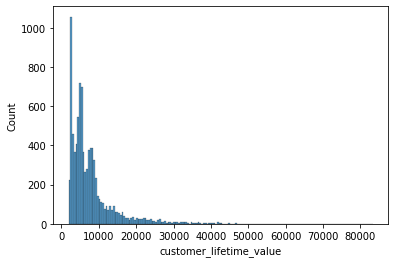

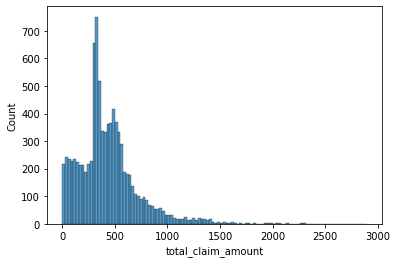

In [191]:
def continuous_plots(df):
    for c in list(df.columns):
        sns.histplot(df[c])
        plt.show()
    return 
    
continuous_plots(continuous_df) 

5. What can you see in the plots?

Distribution is not normal, a lot of the features are right-skewed.

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

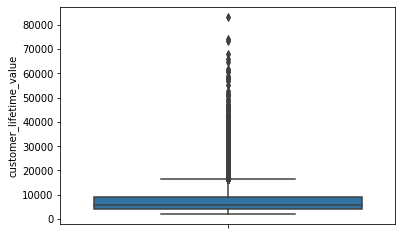

In [193]:
sns.boxplot(y=continuous_df['customer_lifetime_value'])
plt.show()

In [197]:
iqr_clv = np.percentile(continuous_df['customer_lifetime_value'],75) - np.percentile(continuous_df['customer_lifetime_value'],25)
upper_limit = np.percentile(continuous_df['customer_lifetime_value'],75) + 1.5*iqr_clv
print(upper_limit)  #16414

extraordinary_points = continuous_df[continuous_df['customer_lifetime_value'] > upper_limit]
len(extraordinary_points) #817
len(extraordinary_points)/len(continuous_df) #8.9%

16414.039911750002


0.08944602583753011

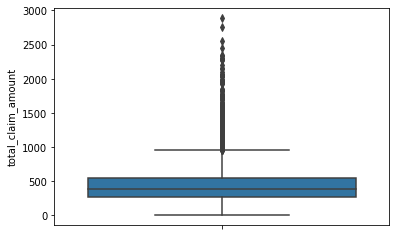

In [194]:
sns.boxplot(y=continuous_df['total_claim_amount'])
plt.show()

In [198]:
iqr_tca = np.percentile(continuous_df['total_claim_amount'],75) - np.percentile(continuous_df['total_claim_amount'],25)
upper_limit = np.percentile(continuous_df['total_claim_amount'],75) + 1.5*iqr_tca
print(upper_limit)  #960

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > upper_limit]
len(extraordinary_points)  #453
len(extraordinary_points)/len(continuous_df)  # 4.9%

960.3997301249999


0.04959492007882636

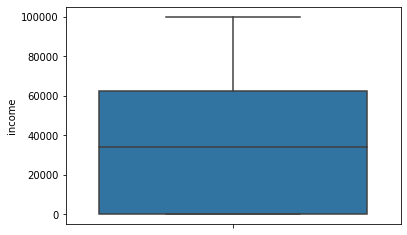

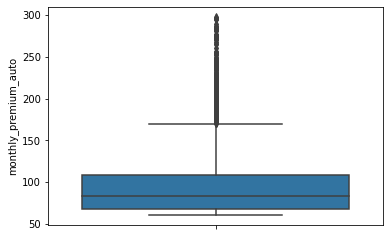

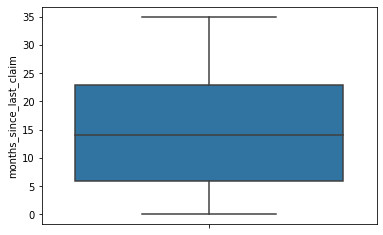

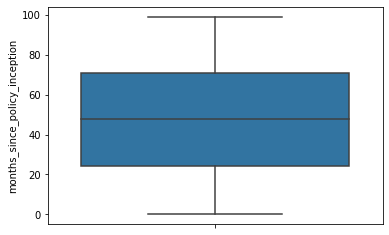

In [212]:
sns.boxplot(y=discrete_df['income'])
plt.show()
sns.boxplot(y=discrete_df['monthly_premium_auto'])
plt.show()
sns.boxplot(y=discrete_df['months_since_last_claim'])
plt.show()
sns.boxplot(y=discrete_df['months_since_policy_inception'])
plt.show()

In [216]:
iqr_mpa = np.percentile(discrete_df['monthly_premium_auto'],75) - np.percentile(discrete_df['monthly_premium_auto'],25)
upper_limit = np.percentile(discrete_df['monthly_premium_auto'],75) + 1.5*iqr_mpa
print(upper_limit)  #170.5

extraordinary_points = discrete_df[discrete_df['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)  #430
len(extraordinary_points)/len(continuous_df)  # 4.7%

170.5


0.047076855703963215

7. Have you found outliers? If you have, what should we do with them?

We can use logartithmic transformation on the continuous variables and monthly_premium_auto to reduce the outliers.

In [204]:
def log_transfom_clean(x):   
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

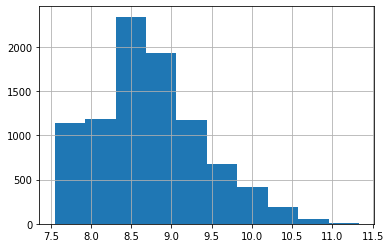

In [206]:
continuous_df['customer_lifetime_value'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean)
continuous_df['customer_lifetime_value'].hist()
plt.show()

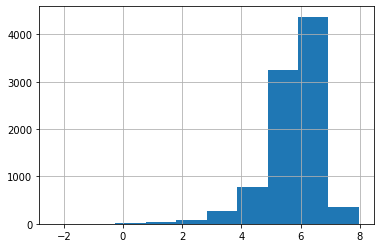

In [205]:
continuous_df['total_claim_amount'] = continuous_df['total_claim_amount'].apply(log_transfom_clean)
continuous_df['total_claim_amount'].hist()
plt.show()

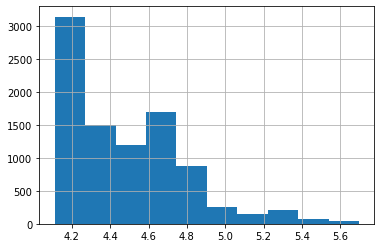

In [217]:
discrete_df['monthly_premium_auto'] = discrete_df['monthly_premium_auto'].apply(log_transfom_clean)
discrete_df['monthly_premium_auto'].hist()
plt.show()

8. Check nan values per column.

In [219]:
discrete_df.isna().sum()

income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
effective_to_date                0
dtype: int64

In [221]:
continuous_df.isna().sum()

customer_lifetime_value    0
total_claim_amount         0
dtype: int64

In [223]:
categorical.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

See #7 in part 1 of lab.

10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

See #8 in part1 of lab.

11. Get categorical features.

See #9 in part 1 of lab.

12. What should we do with the customer id column?

See #10 in part 1 of lab.